# Lesson Three: Introduction to Plotting Data
Congrats, you've made it to week three! This week will be awesome for those of you who are more artistically inclined, as we will be exploring different ways to visualise data. 

![Stonks](https://media.giphy.com/media/YnkMcHgNIMW4Yfmjxr/giphy.gif)

In [6]:
%%html
<script>
code_show=true; 
function code_toggle() {
 $('div.input').show();
} 
$( document ).ready(code_toggle);
</script>

# Section One: Importing Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
florida_data = pd.read_csv('../data/florida_covid_data_the_atlantic.csv')
georgia_data = pd.read_csv('../data/georgia_covid_data_healthcare.csv')

In [4]:
# TODO: Examine the head of the Georgia dataset 
georgia_data.head()

,ethnicity,race,sex,cases,deaths,hospitalization
0,Hispanic/ Latino,African-American/ Black,Female,99,1,5
1,Hispanic/ Latino,African-American/ Black,Male,18,0,0
2,Hispanic/ Latino,American Indian/ Alaska Native,Female,2,0,0
3,Hispanic/ Latino,Asian,Female,12,0,0
4,Hispanic/ Latino,Asian,Male,2,0,1


In [9]:
# TODO: Examine the head of the Florida dataset 
florida_data.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-01-29,FL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,2020-01-30,FL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,2020-01-31,FL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,4,3,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,2020-02-01,FL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,4,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,2020-02-02,FL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,4,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


## Plotting Quantitative Data
For starters, we'll start with some of the most common plots for some of the most common data types: quantitative data. This data deals with independent and dependent variables; we recommend you check out the video below on independent and dependent variables to learn more about them. 

In [8]:
%%html
`<iframe width="560" height="315" src="https://www.youtube.com/embed/l0jTMDtX4WY" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>`

### Line Chart 
A **line chart**  plots the relationship between two variables as a collection of lines connecting points. Line charts are very useful when dealing with data collected over a time period, and we want to view how that data changes over time

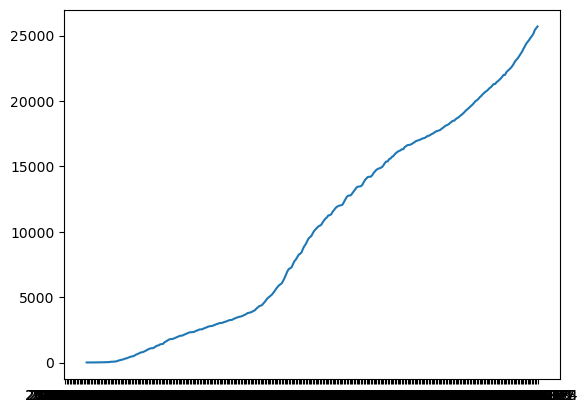

In [22]:
plt.plot(florida_data['date'], florida_data['death'])
plt.show()

### Histogram
A **histogram** tells us how much data falls into a certain range of numbers. Say we wanted to examine the frequency of all names. Think of a histogram as a collection of bar graphs whose heights are determined by how many values fall into certain **bins**. We can use a histogram instead of a line chart this time to view how the data is **distributed**. 

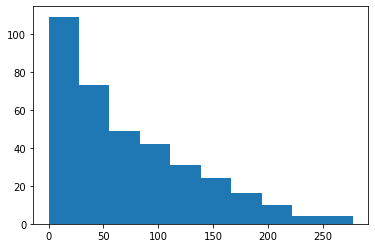

In [11]:
plt.hist(florida_data['deathIncrease'])
plt.show()

## Plotting Categorical Data
Though you may not see this type of data as much as quantitative data in scientific datasets, it is nonetheless equally important to understand some of the best ways to visualize categorical data. As we mentioned for quantitative data, feel free to check out the previous notebook if you need a refresher for what categorical data is. 

### Bar Chart
A bar chart tells us how much of a categorical variable makes up a certain value. Let's try plotting how many COVID cases in Georgia were from each sex. Notice how we select the data below. 

In [78]:
georgia_races = georgia_data.groupby('race').sum()

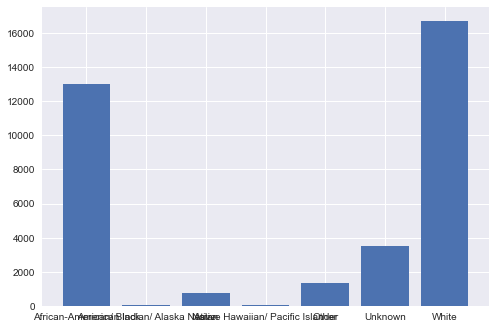

In [81]:
plt.bar(georgia_races.index, georgia_races['cases'])
plt.show()

### Pie Chart
A **pie chart** is useful for showing us what percentage of a total that a categorical variable makes up. We'll use the same data as above (girl names in Wyoming for the year of 2016), but this time we'll only use the top four names.

In [75]:
georgia_hisp = georgia_data[(georgia_data['ethnicity'] == 'Hispanic/ Latino')].groupby('sex').sum()

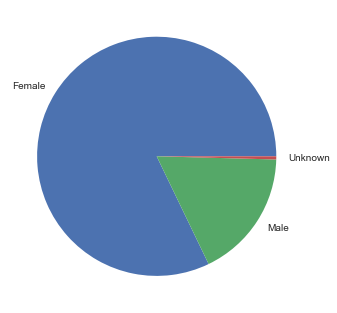

In [76]:
plt.pie(georgia_hisp['cases'], labels=georgia_hisp.index)
plt.show()

## Making Breathtaking Plots 
There's one thing you may have noticed about the plots above: they all look extremely boring. And awful. There's not a whole lot going on, and the plots themselves don't tell us a lot about the data itself. What's being plotted? What does each **axis** represent?

### Adding Labels
One of the most important things to do when plotting data is to label your plot. The plots that we've worked with so far today have had two dimensions: the **x-axis** and the **y-axis**.We can add a title using the ``.title()`` method, an x-axis label using the ``.xlabel()`` method, and a y-label using the ``.ylabel()`` method. Here's the before:

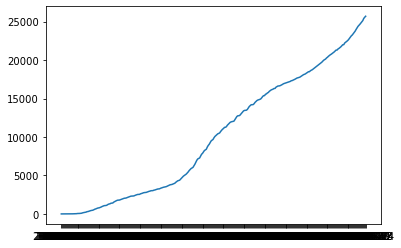

In [24]:
plt.plot(data['date'], data['death'])
plt.show()

And here's the after:

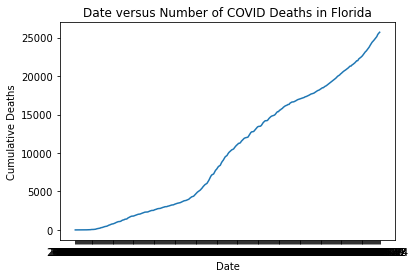

In [25]:
plt.plot(data['date'], data['death'])
plt.title('Date versus Number of COVID Deaths in Florida')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.show()

### Adding Plot Styles 
As you can tell, our plots are pretty, well, boring. They let us explore our data pretty well, but they're just not that visually appealing. To fix this, we can use plot styles. To achieve this, we must use ``plt.style.context()``. 

My personal favorites are the fivethirtyeight and seaborn styles. These styles are nods to two different organizations. [FiveThirtyEight](https://fivethirtyeight.com) is a website that discusses statistics for nearly every topic, especially politics, economics, and sports. Their unique style for creating plots can be used in python by calling `plt.style.use('fivethirtyeight')`. 

![Five Thirty Eight Super Bowl Plot](https://fivethirtyeight.com/wp-content/uploads/2019/01/paine-superbowlduds-1.png?w=575)

[Seaborn](https://seaborn.pydata.org/) is another Python package that is capable of creating advanced data plots. The kind of plots you can create with the Seaborn library are pretty neat, though pretty tricky if you're just starting out. Luckily, we can use their unique and appealing style without having to use the package itself by calling `plt.style.use('seaborn')`.

![Seaborn Plot](https://seaborn.pydata.org/_images/regression_marginals.png)

For a complete list of the available styles, be sure to check out [this website](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html). We'll start by changing our plot to the seaborn style.

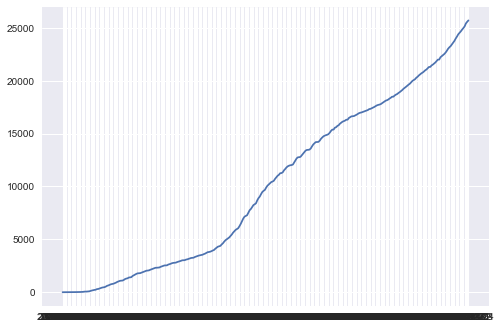

In [38]:
with plt.style.context('seaborn'):
    plt.plot(data['date'], data['death'])
    plt.show()

Wow, our plots are already looking much better than before! What if we want to use the fivethirtyeight style? 

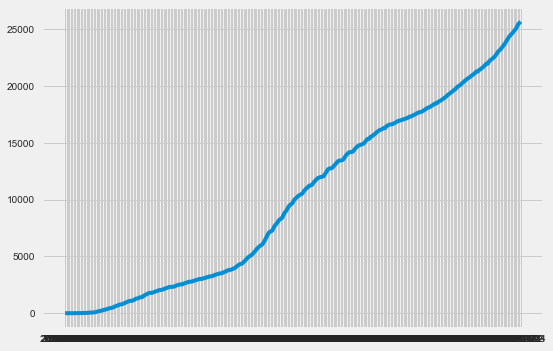

In [39]:
with plt.style.context('fivethirtyeight'):
    plt.plot(data['date'], data['death'])
    plt.show()

Last but not least, let's use the ``.figure()`` method to tell matplotlib we want to make our figure bigger. Let's start by making our plot 20 inches by 5 inches.

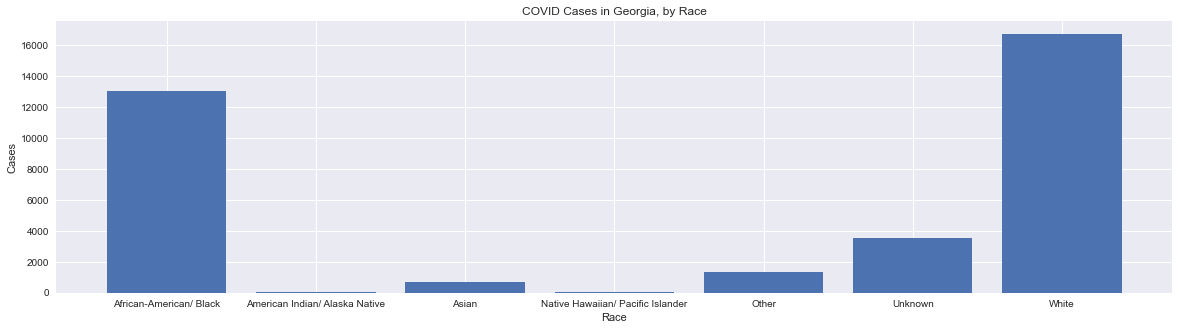

In [87]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20, 5))
    plt.bar(georgia_races.index, georgia_races['cases'])
    plt.title('COVID Cases in Georgia, by Race')
    plt.xlabel('Race')
    plt.ylabel('Cases')
    plt.show()

# Practice
Great job today, we definitely threw a lot of information at you. That being said, make sure to practice to perfect your Python plotting skills. For today's practice assignment, we'll give you a lot of lee-way into determining which plot you want to create. Just be sure to justify why you're using that plot in particular. For example, if your data is primarily quantitative, and you want to compare two quantitative variables, you could use a histogram. Let's start by importing our data

In [14]:
plt.style.use('default')

### **Question One** 
Create a line chart, showing the date on the x-axis and the increase in hospitalizations on the y-axis. Use the florida dataset

In [ ]:
# TODO: Plot your data


### **Question Two** 
Recreate the plot from above, but this time, label your axes and provide a title. For the date axis, use "Date". For the hospitalizations axis, use "Hospitalizations". For the plot title, use "Increase in Hospitalizations in Florida".

In [ ]:
# TODO: Plot your data


### **Question Three** 
Let's go ahead and create a bar chart, grouping Georgia COVID-19 cases by ethnicity. This problem involves two steps. First group your data into the variable *georgia_ethnicity*. Then, go ahead and create a bar chart of this data. Be sure to label your axes: for the counts axis, use the label "Cases". For the ethnicities axis, use the label "Ethnicities". For the title, use "COVID-19 Cases per Ethnicity in Georgia". 

In [23]:
# TODO: Group the data into the variable "georgia_ethnicity"
georgia_ethnicity = georgia_data.groupby('ethnicity').sum()

<BarContainer object of 3 artists>

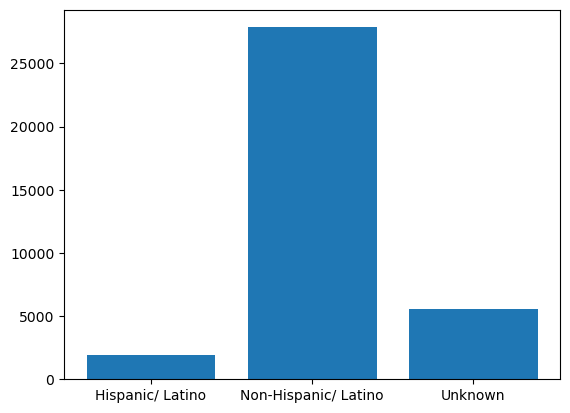

In [24]:
# TODO" Plot the number of cases for each ethnicity in the "georgia_ethnicity" group
plt.bar(georgia_ethnicity.index, georgia_ethnicity['cases'])

### **Question Four** 
Finally, let's go ahead and create a pie chart for our data, showing the spread of cases between Females of each race. This problem involves two steps. First, sort and group your data into the variable *georgia_female_race*. Make sure to sum over each group to obtain the total number of cases. Then, go ahead and create a pie chart of this data. Be sure to add a title to your plot: use "Distribution of Female COVID-19 Cases per Race in Georgia". Also, be sure to include the labels for each race.

In [26]:
# TODO: Group the data into the variable "georgia_female_race"
georgia_female_race = georgia_data[(georgia_data['sex'] == 'Female')].groupby('race').sum()

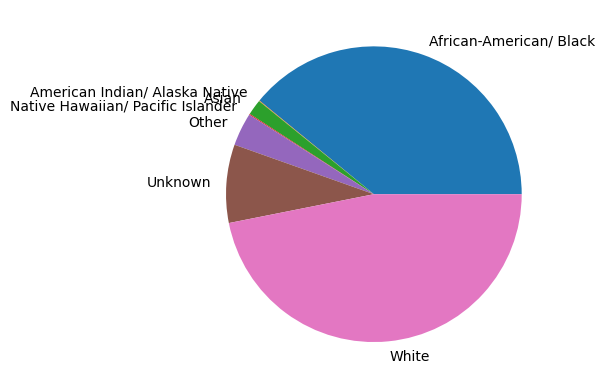

In [28]:
# TODO" Plot the number of cases for each race in the "georgia_female_race" group
plt.pie(georgia_female_race['cases'], labels=georgia_female_race.index)
plt.show()

## 🏅Challenge
Time for the challenge question! This one will require you to do a bit of investigating the matplotlib package for yourself. For this, we're going to plot Florida COVID data on one plot. We'll plot both Florida daily death increases, as well as Florida hospitalization increases. 

Make sure to plot the deaths in the color black, and the hospitalizations in the color red. Furthermore, we'll go ahead and include a plot legend using ``plt.legend()``. Be sure to pass in the *label* argument when creating each line plot: for the death line plot, use the label "Deaths", and for the hospitalized line plot, use the label "Hospitalized" 

Finally, make sure to label your axes. Label the date axis with "Date", the count axis with "Count", and add the title "Deaths versus Hospitalizations in Florida"

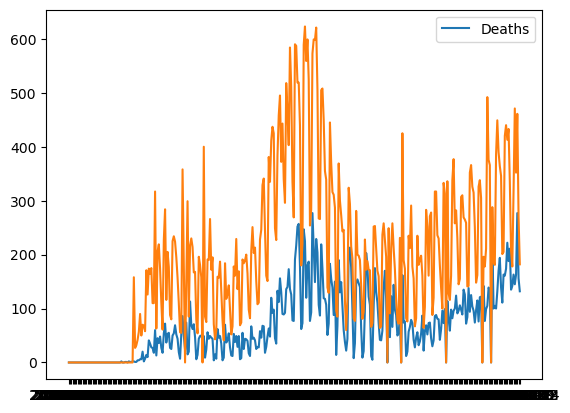

In [34]:
# TODO: Create the unique data plot
plt.plot(florida_data['date'], florida_data['deathIncrease'], label='Deaths')
plt.plot(florida_data['date'], florida_data['hospitalizedIncrease'])
plt.legend()
plt.show()

Okay that's all we have for this week. Please feel free to reach out to us through email or attend our weekly Office Hours for questions or help on the practice problems.